In [10]:
def cipher(text, shift, encrypt=True):
    alphabet = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    new_text = ''
    for c in text:
        index = alphabet.find(c)
        if index == -1:
            new_text += c
        else:
            new_index = index + shift if encrypt == True else index - shift
            new_index %= len(alphabet)
            new_text += alphabet[new_index:new_index+1]
    return new_text

### 1. Test the encrypt function

##### a) Write a test function that checks whether the cipher function works using a single word as an example.

In [17]:
def test_cipher_with_single_word():
    actual = cipher('a',1)
    expect = 'b'
    assert actual == expect
    
test_cipher_with_single_word()

##### b) Write a test function that checks a negative shift works (shift < 0).

In [19]:
def test_cipher_with_negative_shift():
    actual = cipher('b',-1)
    expect = 'a'
    assert actual == expect
    
test_cipher_with_negative_shift()

##### c) Write a test for the case when the text contains symbols which are not in the alphabet.

In [27]:
def test_cipher_with_symbols():
    actual = cipher('NOPE!',4)
    expect = 'RSTI!'
    assert actual == expect
    
test_cipher_with_symbols()

##### d) Add an assertion to the original function that causes an exception when the shift parameter is set to a string (e.g. "two"). Now, add a test that checks for that exception occurring as expected when a string is passed to shift.

In [40]:
def cipher(text, shift, encrypt=True):
    assert isinstance(shift, int), "shift argument should be type int"
    alphabet = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    new_text = ''
    for c in text:
        index = alphabet.find(c)
        if index == -1:
            new_text += c
        else:
            new_index = index + shift if encrypt == True else index - shift
            new_index %= len(alphabet)
            new_text += alphabet[new_index:new_index+1]
    return new_text

def test_cipher_with_exception():
    with pytest.raises(AssertionError):
        cipher('d','one')

##### e) Add the tests from 1a, 1b, 1c, and 1d to a file called test_cipher.py in your folder. Run all the tests from your command line using pytest (and verbosity setting -vv) and add a screen shot of the command and the output to your homework solution.

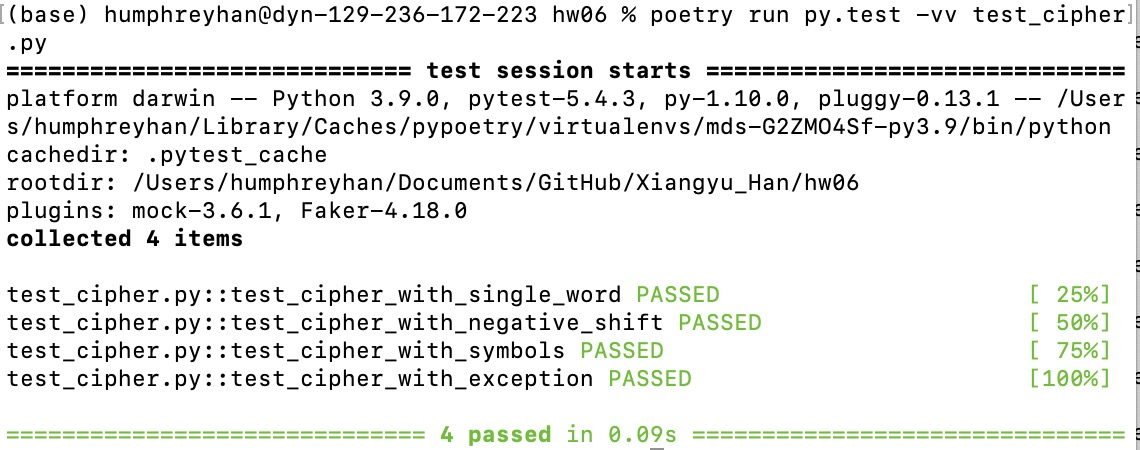

##### f) Now, expand the test in (1a) using several examples which include a single word, lower case only, upper case only, and a sentence with spaces. Use a fixture for this, so that this remains a single test function.

In [82]:
@pytest.mark.parametrize("text, shift, expected", [
    ('L', 3, 'O'),
    ('columbia', 4,'gspyqfme'),
    ('COLUMBIA', 4,'GSPYQFME'),
    ('Columbia university is in Ivy League.', 1, 'Dpmvncjb vojwfstjuz jt jo Jwz Mfbhvf.'),
])
def test_cipher_with_single_word_expanded(text, shift, expected):
    actual = cipher(text, shift)
    expect = expected
    assert actual == expect

##### g) Write a simple integration-like test that relies on the fact that we can encrypt and decrypt a string using the function (using the encrypt parameter). That is, your test should start with a string, encrypt it, decrypt it, and then compare the result to the starting point. Set up a test that runs this for shift values from 1 to 10.



In [97]:
def test_cipher_integration(text, expected):
    for i in range(1,11):
        shift = i
        mid = cipher(text, shift, True)
        actual = cipher(mid,shift, False)
        assert actual == expected
test_cipher_with_single_word_looping('abc','abc')

### 2. [OPTIONAL - BONUS] Test class
Add the test methods from 1a-1c to a test class. Now, parametrize your class, so that the same five test cases will be sent to all of the test functions in the class. [Note: I did no show this exact procedure in class but this is quite similar to the implementation in 1f].

Add the test class to a file called test_cipher_class.py in your folder. Run all the tests in the test class from your command line using pytest (and verbosity setting -vv) and add a screen shot of the command and the output to your homework solution.

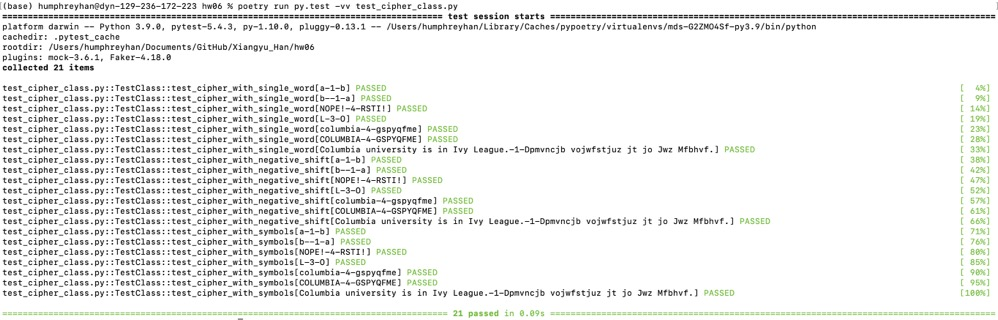